# US Accident Exploratory Data Analysis

Todo - talk about EDA todo - talk about dataset (source, what it contains, how it will be usefull)
     #kaggle
     #information about accidents
     #can be useful to prevent accidents

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation and Cleaning
     1. Look at some information about the data and the columns.
     2. Fix any missing or incorrect value.

In [5]:
data_filename = "C:/Users/Lenovo/Desktop/notebook/US_Accidents_Dec20.csv/US_Accidents_Dec20.csv"
df = pd.read_csv(data_filename)

In [6]:
df.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
df.describe() #this gives statistics of each numeric columns 

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [10]:
#to get numeric datatype columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df.select_dtypes(include=numerics)

In [11]:
new_df

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,201.0,3,39.865147,-84.058723,NaN,NaN,0.010,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,201.0,2,39.928059,-82.831184,NaN,NaN,0.010,2584.0,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,201.0,2,39.063148,-84.032608,NaN,NaN,0.010,NaN,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,201.0,3,39.747753,-84.205582,NaN,NaN,0.010,NaN,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,201.0,2,39.627781,-84.188354,NaN,NaN,0.010,NaN,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,NaN,2,34.002480,-117.379360,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
4232537,NaN,2,32.766960,-117.148060,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
4232538,NaN,2,33.775450,-117.847790,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
4232539,NaN,2,33.992460,-118.403020,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [12]:
#to find total missing values
new_df.isna().sum()

TMC                  1516064
Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              2716477
End_Lng              2716477
Distance(mi)               0
Number               2687949
Temperature(F)         89900
Wind_Chill(F)        1896001
Humidity(%)            95467
Pressure(in)           76384
Visibility(mi)         98668
Wind_Speed(mph)       479326
Precipitation(in)    2065589
dtype: int64

In [13]:
#percentage of missing values per column, 
#we can drop those column whose percentage are more or around 50 as they might not be helpfull in predicting results
new_df.isna().sum().sort_values(ascending=False) / len(df) *100

End_Lat              64.180760
End_Lng              64.180760
Number               63.506745
Precipitation(in)    48.802575
Wind_Chill(F)        44.795809
TMC                  35.819240
Wind_Speed(mph)      11.324781
Visibility(mi)        2.331176
Humidity(%)           2.255548
Temperature(F)        2.124020
Pressure(in)          1.804684
Severity              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
dtype: float64

In [14]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lng                  6.418076e-01
End_Lat                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Sunrise_Sunset           3.331332e-05
Civil_Twilight           3.331332e-05
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Severity                 0.000000e+00
Start_Time  

<AxesSubplot:>

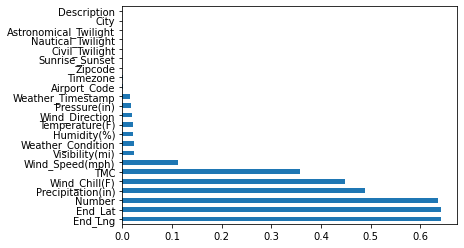

In [15]:
missing_percentages[missing_percentages !=0 ].plot(kind="barh")

## Exploratory Analysis and Visualization

1.City(shows the city in address record)
2.Start time
3.Start lat, Start Lng
4.Temperature
5.Weather_Condition(rain,snow,thunderstorm,fog,etc.)

### City

In [16]:
df.City.unique().shape

(12251,)

In [17]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

<AxesSubplot:>

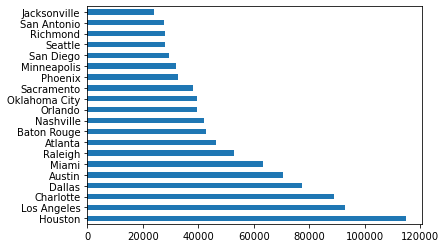

In [18]:
df.City.value_counts()[:20].plot(kind="barh")

In [19]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

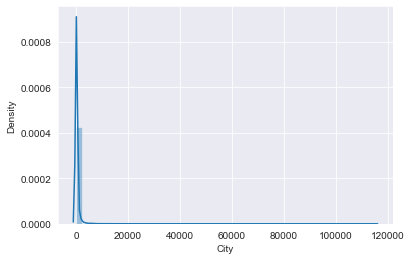

In [20]:
sns.distplot(cities_by_accidents)

In [21]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [22]:
len(high_accident_cities)

704

<AxesSubplot:xlabel='City', ylabel='Count'>

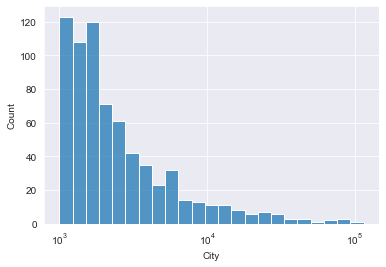

In [23]:
sns.histplot(high_accident_cities, log_scale = True)

<AxesSubplot:xlabel='City', ylabel='Count'>

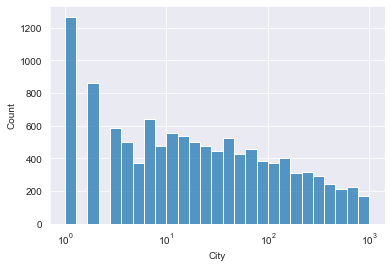

In [24]:
sns.histplot(low_accident_cities, log_scale = True)

In [25]:
cities_by_accidents[cities_by_accidents == 1]

River Oaks       1
Saint Landry     1
Korbel           1
Gladewater       1
Gifford          1
                ..
Jeanerette       1
Westmorland      1
Mount Pulaski    1
Two Rivers       1
Orland Hills     1
Name: City, Length: 1267, dtype: int64

### Start_Time

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [27]:
df.Start_Time.dt.hour   #hour of the day

0           5
1           6
2           6
3           7
4           7
           ..
4232536    18
4232537    19
4232538    19
4232539    19
4232540    18
Name: Start_Time, Length: 4232541, dtype: int64

#### Q. Which hour of the day has the highest accidents?

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

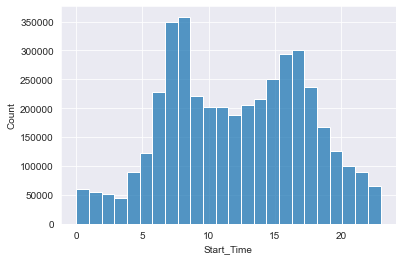

In [28]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

A high percentage of accident happen between 6am to 10 am (probably people are in hurry due to work).
Next higher time is 3pm to 6pm.

#### Q. Which days of the week has higher accidents?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

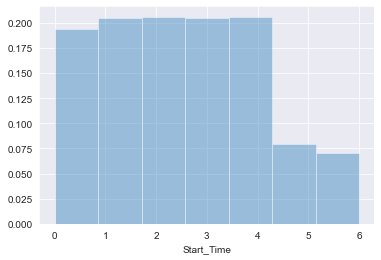

In [29]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

All the weekdays has almost same accidents, while the weekends has the least accidents.

#### Q. Is the distribution by hour the same on weekends as on weekdays?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

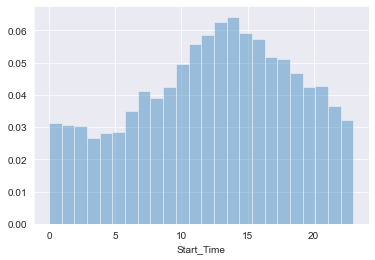

In [30]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sunday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

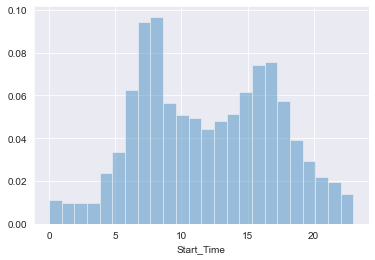

In [31]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On weekends , the peak is in between 10am to 3pm unlike weekday(6am-8am).

### Source of data

<AxesSubplot:ylabel='Source'>

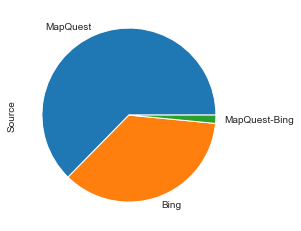

In [32]:
df.Source.value_counts().plot(kind='pie')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

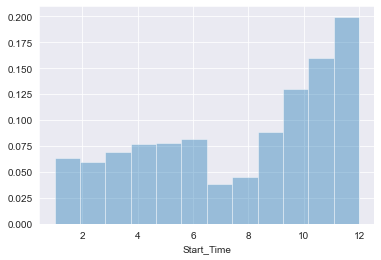

In [33]:
df_bing = df[df.Source == 'Bing']
sns.distplot(df_bing.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

<AxesSubplot:xlabel='Start_Time'>

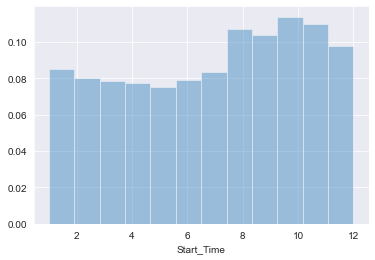

In [34]:
df_MapQuest = df[df.Source == 'MapQuest']
sns.distplot(df_MapQuest.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

Consider excluding binge data,as it seems pretty missing out on values. We will still be left with roughly 67% of data.

### Start latitude and longitude

In [35]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [36]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

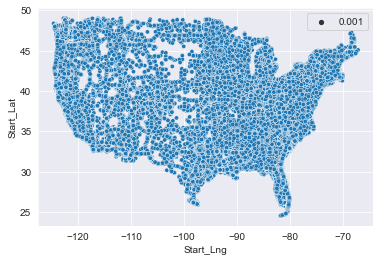

In [37]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001)